# Import Libraries

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit
from sklearn import linear_model
import scipy
from scipy.stats import chisquare

# Define file name

In [9]:
step = 8
step_size = 0.02
start = 0.16
pot_name_array = [0 for a in range(step)]
meta_name_array = [0 for a in range(step)]
for i in range(step):
    file_name = str(start + step_size * i)
    
    if (len(file_name) == 3):
        file_name = file_name +'0'
        
    if (len(file_name) >4):
        file_name = file_name[0:4]
    
    meta_name = 'meta/' + file_name + '_meta.dat'
    file_name = 'potential/' + file_name + '_potential.dat'
    
    pot_name_array[i] = file_name
    meta_name_array[i] = meta_name
print(pot_name_array)
print(meta_name_array)

['potential/0.16_potential.dat', 'potential/0.18_potential.dat', 'potential/0.20_potential.dat', 'potential/0.22_potential.dat', 'potential/0.24_potential.dat', 'potential/0.26_potential.dat', 'potential/0.28_potential.dat', 'potential/0.30_potential.dat']
['meta/0.16_meta.dat', 'meta/0.18_meta.dat', 'meta/0.20_meta.dat', 'meta/0.22_meta.dat', 'meta/0.24_meta.dat', 'meta/0.26_meta.dat', 'meta/0.28_meta.dat', 'meta/0.30_meta.dat']


# Defining Fit_function

In [10]:
def fit_function(x, Beta_1, Beta_2):
    #y = V_0 * A * np.log(Beta_1 * (x ** Beta_2)+ Beta_3 )
    #y = Beta_1 + Beta_2*x + Beta_3 * x**2
    y =  V_0 * np.exp(-1 * Beta_1 * x / tot_layer  + Beta_2)
    return y

# Fitting the potential 

In [11]:
## This cell is not used for analysis. Just to show the form of dataframe used 
df = pd.read_csv(pot_name_array[0])
V_0 = float(df.columns[0])
df.loc[-1] = V_0
df.index = df.index + 1
df.sort_index(inplace=True) 
df['layer'] = range(1,df.shape[0]+ 1, 1)
df.rename(columns = {df.columns[0]: 'potential'}, inplace = True)
tot_layer = df.shape[0]
sheet_carrier_density = float(pd.read_csv(meta_name_array[0]).iloc[-1].values[0])
df['sheet_carrier_density'] = sheet_carrier_density
df

,potential,layer,sheet_carrier_density
0,-0.160000,1,1.587369e+14
1,-0.144080,2,1.587369e+14
2,-0.128817,3,1.587369e+14
3,-0.114514,4,1.587369e+14
4,-0.101455,5,1.587369e+14
...,...,...,...
75,-0.000370,76,1.587369e+14
76,-0.000286,77,1.587369e+14
77,-0.000196,78,1.587369e+14
78,-0.000100,79,1.587369e+14


-0.16 eV :
coefficients [9.1941832 0.1158356]


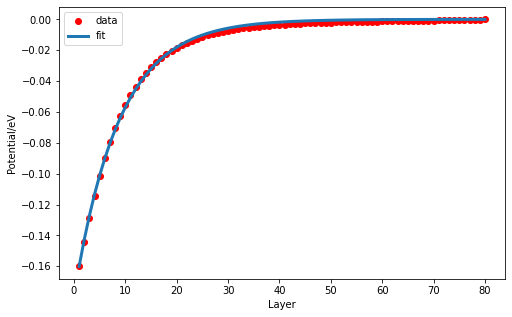

r2_score aveage over 4 validations: -1.523201632476113
_____________________________________________________________________________
-0.18 eV :
coefficients [9.23615688 0.12669665]


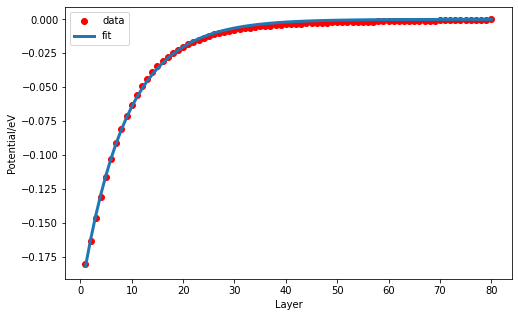

r2_score aveage over 4 validations: -1.4209150514346067
_____________________________________________________________________________
-0.2 eV :
coefficients [9.10366383 0.1342513 ]


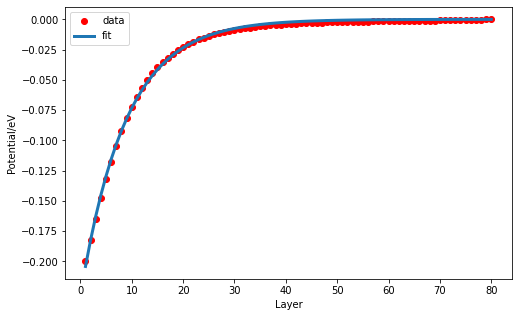

r2_score aveage over 4 validations: -1.1911761814433088
_____________________________________________________________________________
-0.22 eV :
coefficients [8.96407264 0.1428897 ]


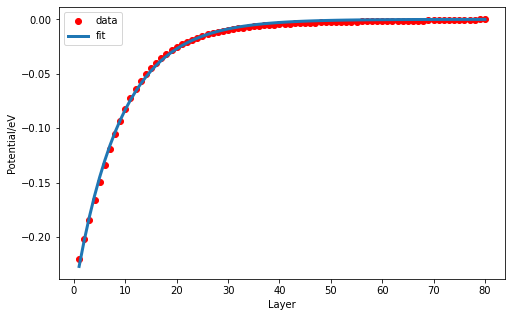

r2_score aveage over 4 validations: -0.9479085145808697
_____________________________________________________________________________
-0.24 eV :
coefficients [8.77922649 0.15183699]


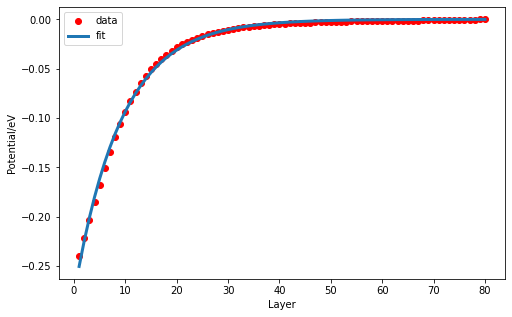

r2_score aveage over 4 validations: -0.5298733014089689
_____________________________________________________________________________
-0.26 eV :
coefficients [8.51671389 0.1593587 ]


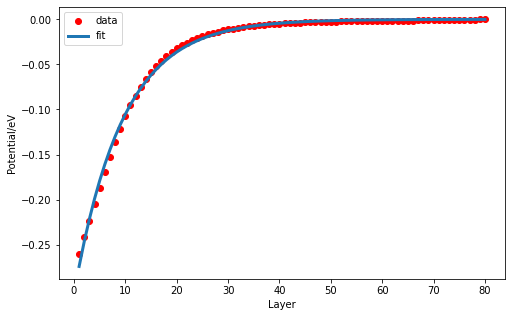

r2_score aveage over 4 validations: -0.15880199796056677
_____________________________________________________________________________
-0.28 eV :
coefficients [8.23271733 0.16435601]


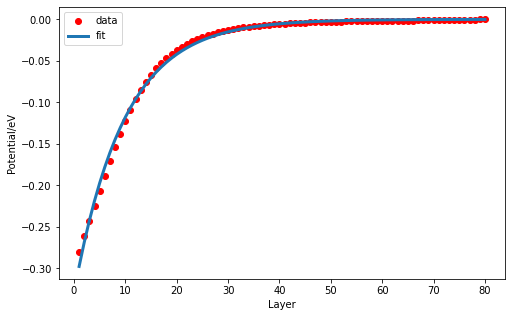

r2_score aveage over 4 validations: 0.07245840702714046
_____________________________________________________________________________
-0.3 eV :
coefficients [7.96737065 0.16951501]


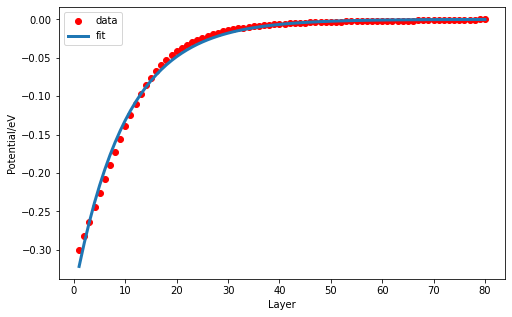

r2_score aveage over 4 validations: 0.3126675054911978
_____________________________________________________________________________


In [17]:
# number of cross-validation 
n = 4

# to save coefficients 
popt_array = [0 for a in range(step)]

# to save r2_score
r2_array = [0 for a in range(step)]

V_0_array = [0 for a in range(step)]

for i in range(step):
    
    # Setting up dataframe
    df = pd.read_csv(pot_name_array[i])
    V_0 = float(df.columns[0])
    df.loc[-1] = V_0
    df.index = df.index + 1
    df.sort_index(inplace=True) 
    df['layer'] = range(1,df.shape[0]+ 1, 1)
    df.rename(columns = {df.columns[0]: 'potential'}, inplace = True)
    tot_layer = df.shape[0]
    sheet_carrier_density = float(pd.read_csv(meta_name_array[0]).iloc[-1].values[0])
    df['sheet_carrier_density'] = sheet_carrier_density
    V_0_array[i] = V_0
    
    x_data, y_data = (df["layer"].values, df["potential"].values)
    
    popt, pcov = curve_fit(fit_function, x_data, y_data)
    popt_array[i] = popt
    print(str(V_0), 'eV :')
    print('coefficients', popt)
    
    # Plotting plot
    x = df['layer'] 
    plt.figure(figsize=(8,5))
    y = fit_function(x, *popt)
    plt.plot(x_data, y_data, 'ro', label='data')
    plt.plot(x,y, linewidth=3.0, label='fit')
    plt.legend(loc='best')
    plt.ylabel('Potential/eV')
    plt.xlabel('Layer')
    plt.show()
    
    
    kf = KFold(n_splits=n) # Define the split - into 2 folds 
    kf.get_n_splits(x_data) # returns the number of splitting iterations in the cross-validator

    r2score = 0 

    for train_index, test_index in kf.split(x_data):
        X_train, X_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]

        # predict using test set
        y_hat = fit_function(X_test, *popt)
        # evaluation
        #print("Mean absolute error: %.5f" % np.mean(np.absolute(y_hat - y_test)))
        #print("Residual sum of squares (MSE): %.5f" % np.mean((y_hat - y_test) ** 2))
        #print("R2-score: %.5f" % r2_score(y_test,y_hat) )
        r2score += r2_score(y_test,y_hat)

        """
        x = X_test 
        plt.figure(figsize=(8,5))
        y = fit_function(x, *popt)
        plt.plot(X_test, y_test, 'ro', label='data')
        plt.plot(X_test ,y_hat, linewidth=3.0, label='fit')
        plt.legend(loc='best')
        plt.ylabel('Potential/eV')
        plt.xlabel('Layer')
        plt.show()
        """

    r2score = r2score/n
    r2_array[i] = r2score
    print('r2_score aveage over', n, 'validations:', r2score)
    print('_____________________________________________________________________________')

popt_array = np.asanyarray(popt_array)
    

# Analysing the coefficients

1 th coefficient


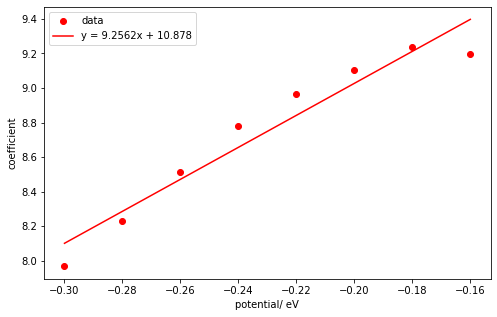

Mean absolute error: 0.09768
Residual sum of squares (MSE): 0.01256
R2-score: 0.93473
Power_divergenceResult(statistic=array([0.01132913]), pvalue=array([nan]))
Coefficients:  9.256298531005678
Intercept:  10.878211776264136
_________________________________________________________________________
2 th coefficient


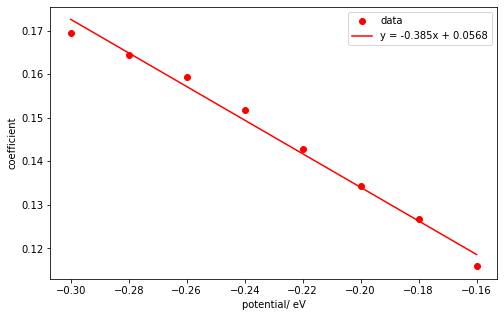

Mean absolute error: 0.00159
Residual sum of squares (MSE): 0.00000
R2-score: 0.98839
Power_divergenceResult(statistic=array([0.00020021]), pvalue=array([nan]))
Coefficients:  -0.38590603234031423
Intercept:  0.05683410889671803
_________________________________________________________________________


In [13]:
for i in range(len(popt_array[0,:])):
    plt.figure(figsize=(8,5))
    
    print(i+1, 'th coefficient')
    x = np.asanyarray(V_0_array).reshape((step,1))
    y = np.asanyarray(popt_array[:,i]).reshape((step,1))
    regr = linear_model.LinearRegression()
    regr.fit(x, y)

    label = 'y = ' + str(regr.coef_[0][0])[0:6] + 'x + ' + str(regr.intercept_[0])[0:6]
    
    plt.plot(x, y, 'ro', label = 'data')
    plt.plot(x, regr.coef_[0][0]*x + regr.intercept_[0], '-r', label= label)
    plt.ylabel('coefficient')
    plt.xlabel('potential/ eV')
    plt.legend(loc='best')
    plt.show()
    
    y_pred = regr.predict(x)
    
    print("Mean absolute error: %.5f" % np.mean(np.absolute(y- y_pred)))
    print("Residual sum of squares (MSE): %.5f" % np.mean((y - y_pred) ** 2))
    print("R2-score: %.5f" % r2_score(y , y_pred) )
    
    chi_square = chisquare(y, f_exp= y_pred, ddof= tot_layer - len(popt_array[0,:]), axis = 0)
    print(chi_square)
    print ('Coefficients: ', regr.coef_[0][0])
    print ('Intercept: ',regr.intercept_[0])
    print('_________________________________________________________________________')

# Determine the overall r2_score

In [21]:
# number of cross-validation 
n = 4

# to save coefficients 
popt_array = [0 for a in range(step)]

# to save r2_score
r2_array = [0 for a in range(step)]

V_0_array = [0 for a in range(step)]

for i in range(step):
    
    # Setting up dataframe
    df = pd.read_csv(pot_name_array[i])
    V_0 = float(df.columns[0])
    df.loc[-1] = V_0
    df.index = df.index + 1
    df.sort_index(inplace=True) 
    df['layer'] = range(1,df.shape[0]+ 1, 1)
    df.rename(columns = {df.columns[0]: 'potential'}, inplace = True)
    tot_layer = df.shape[0]
    print(str(V_0), 'eV :')
    V_0_array[i] = V_0
    
    x_data, y_data = (df["layer"].values, df["potential"].values)

    # build the model using train set
    popt, pcov = curve_fit(fit_function, x_data, y_data)

    # predict using test set
    y_hat = fit_function(x_data, *popt)
    # evaluation
    print("Mean absolute error: %.5f" % np.mean(np.absolute(y_hat - y_data)))
    print("Residual sum of squares (MSE): %.9f" % np.mean((y_hat - y_data) ** 2))
    print("R2-score: %.5f" % r2_score(y_data,y_hat) )
    
    r2_array[i] = r2_score(y_data,y_hat)

print('average r2_score', np.mean(r2_array))

-0.16 eV :
Mean absolute error: 0.00114
Residual sum of squares (MSE): 0.000001561
R2-score: 0.99869
-0.18 eV :
Mean absolute error: 0.00114
Residual sum of squares (MSE): 0.000001574
R2-score: 0.99898
-0.2 eV :
Mean absolute error: 0.00122
Residual sum of squares (MSE): 0.000001944
R2-score: 0.99901
-0.22 eV :
Mean absolute error: 0.00145
Residual sum of squares (MSE): 0.000003129
R2-score: 0.99873
-0.24 eV :
Mean absolute error: 0.00163
Residual sum of squares (MSE): 0.000005143
R2-score: 0.99831
-0.26 eV :
Mean absolute error: 0.00198
Residual sum of squares (MSE): 0.000009133
R2-score: 0.99757
-0.28 eV :
Mean absolute error: 0.00251
Residual sum of squares (MSE): 0.000015353
R2-score: 0.99661
-0.3 eV :
Mean absolute error: 0.00311
Residual sum of squares (MSE): 0.000024810
R2-score: 0.99543
average r2_score 0.9979161134985479


# K-Cross validation 

-0.16 eV :
Mean absolute error: 0.00095
Residual sum of squares (MSE): 0.00000
R2-score: 0.99935


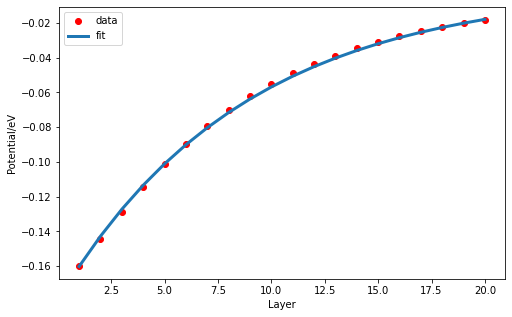

Mean absolute error: 0.00148
Residual sum of squares (MSE): 0.00000
R2-score: 0.84646


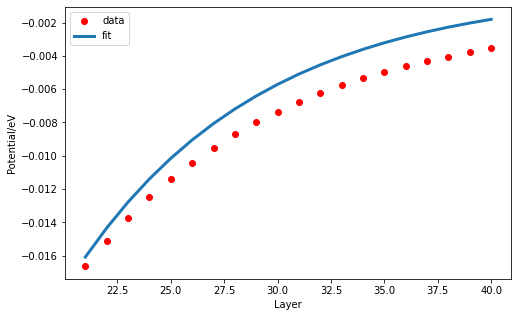

Mean absolute error: 0.00147
Residual sum of squares (MSE): 0.00000
R2-score: -5.23082


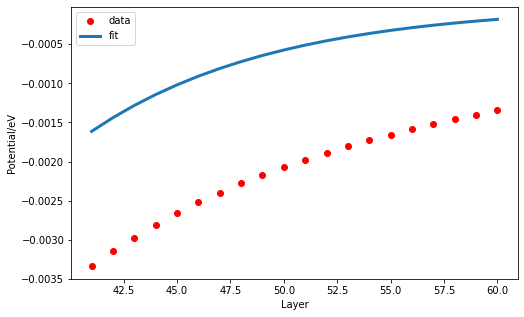

Mean absolute error: 0.00065
Residual sum of squares (MSE): 0.00000
R2-score: -2.70780


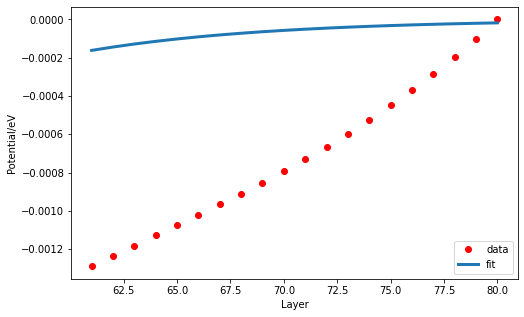

r2_score aveage over 4 validations: -1.523201632476113
_____________________________________________________________________________
-0.18 eV :
Mean absolute error: 0.00115
Residual sum of squares (MSE): 0.00000
R2-score: 0.99928


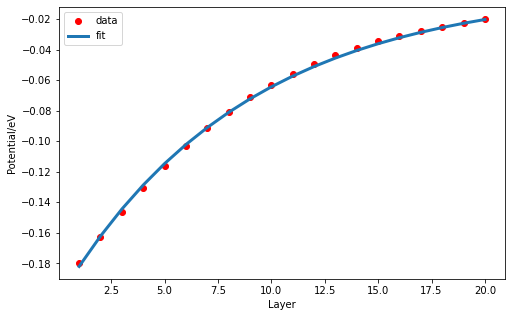

Mean absolute error: 0.00124
Residual sum of squares (MSE): 0.00000
R2-score: 0.90451


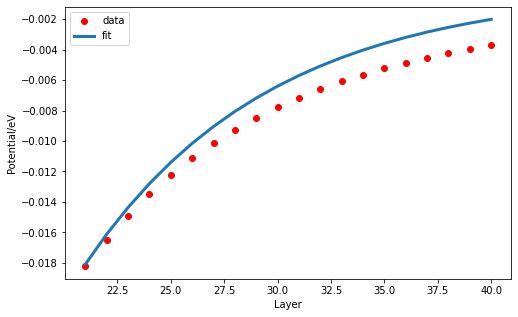

Mean absolute error: 0.00149
Residual sum of squares (MSE): 0.00000
R2-score: -4.87127


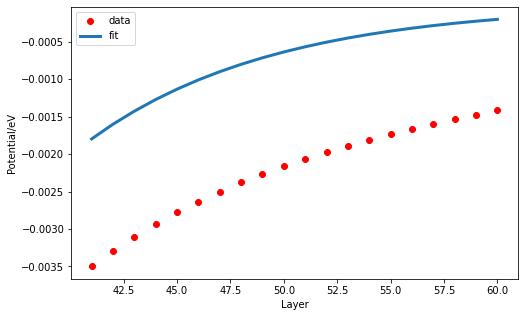

Mean absolute error: 0.00069
Residual sum of squares (MSE): 0.00000
R2-score: -2.71618


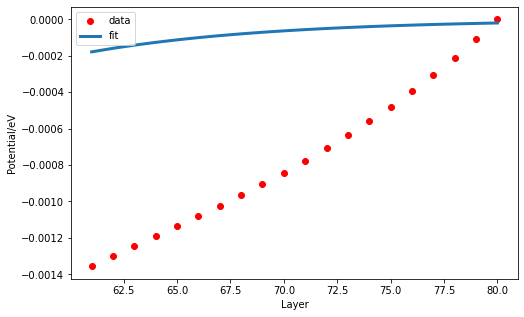

r2_score aveage over 4 validations: -1.4209150514346067
_____________________________________________________________________________
-0.2 eV :
Mean absolute error: 0.00160
Residual sum of squares (MSE): 0.00000
R2-score: 0.99885


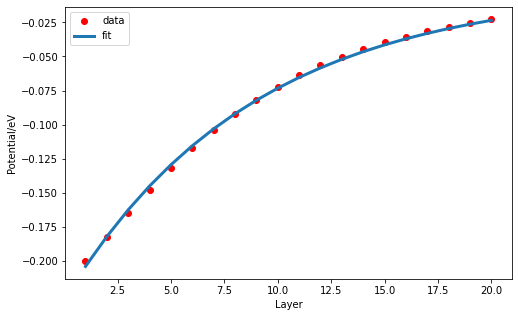

Mean absolute error: 0.00101
Residual sum of squares (MSE): 0.00000
R2-score: 0.94304


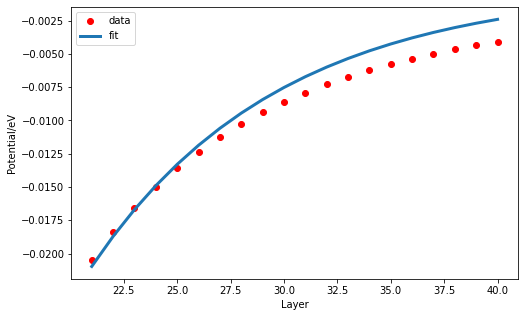

Mean absolute error: 0.00153
Residual sum of squares (MSE): 0.00000
R2-score: -4.12566


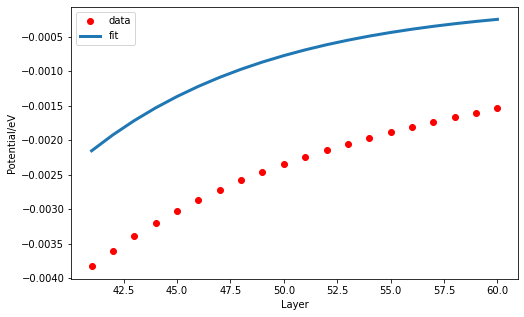

Mean absolute error: 0.00073
Residual sum of squares (MSE): 0.00000
R2-score: -2.58093


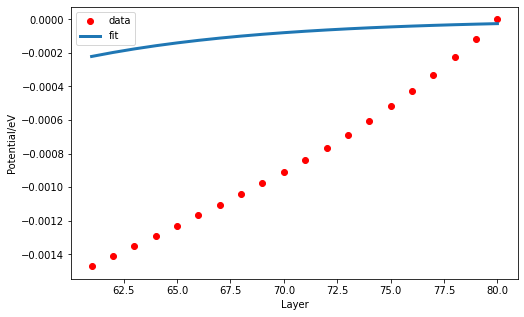

r2_score aveage over 4 validations: -1.1911761814433088
_____________________________________________________________________________
-0.22 eV :
Mean absolute error: 0.00246
Residual sum of squares (MSE): 0.00001
R2-score: 0.99777


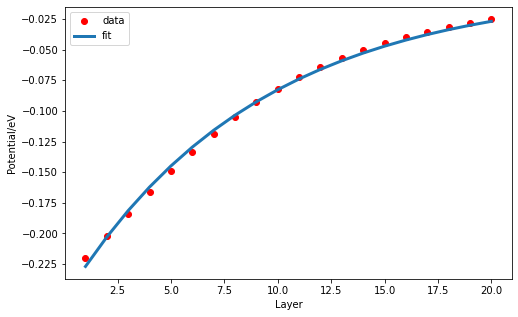

Mean absolute error: 0.00100
Residual sum of squares (MSE): 0.00000
R2-score: 0.95764


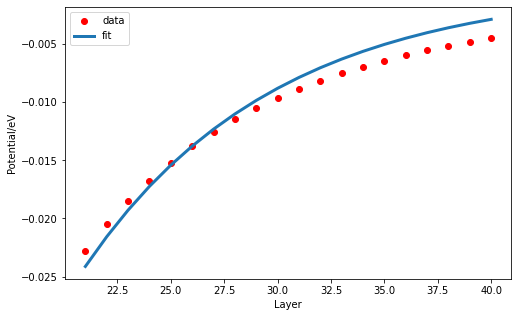

Mean absolute error: 0.00156
Residual sum of squares (MSE): 0.00000
R2-score: -3.31437


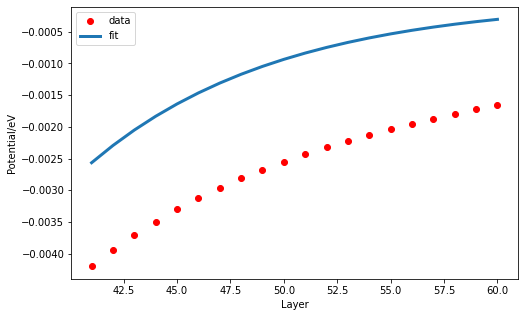

Mean absolute error: 0.00077
Residual sum of squares (MSE): 0.00000
R2-score: -2.43269


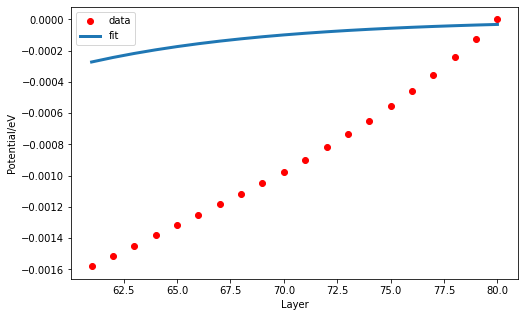

r2_score aveage over 4 validations: -0.9479085145808697
_____________________________________________________________________________
-0.24 eV :
Mean absolute error: 0.00348
Residual sum of squares (MSE): 0.00002
R2-score: 0.99616


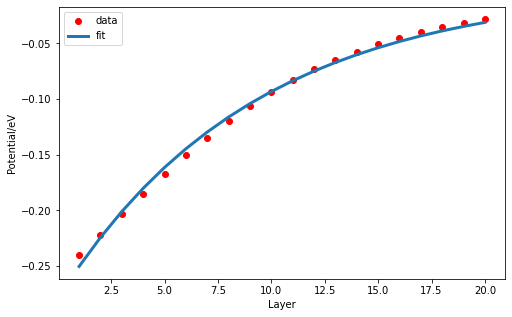

Mean absolute error: 0.00094
Residual sum of squares (MSE): 0.00000
R2-score: 0.96608


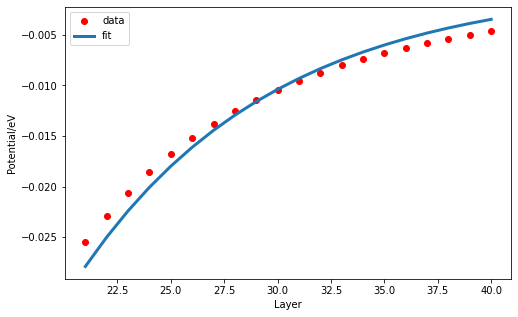

Mean absolute error: 0.00136
Residual sum of squares (MSE): 0.00000
R2-score: -1.89150


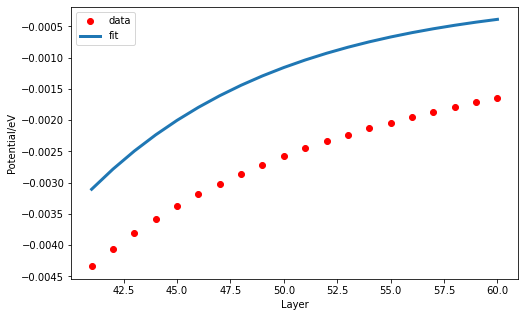

Mean absolute error: 0.00074
Residual sum of squares (MSE): 0.00000
R2-score: -2.19024


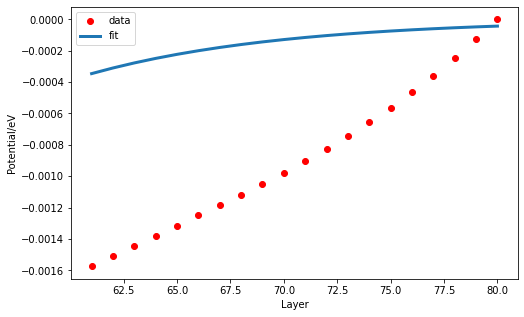

r2_score aveage over 4 validations: -0.5298733014089689
_____________________________________________________________________________
-0.26 eV :
Mean absolute error: 0.00466
Residual sum of squares (MSE): 0.00003
R2-score: 0.99394


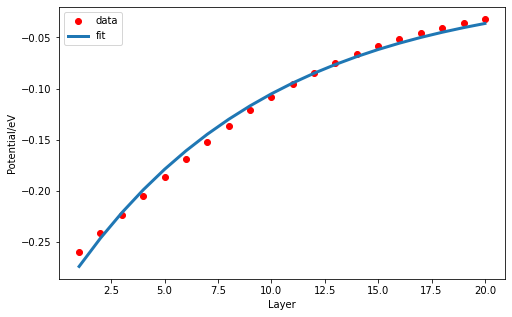

Mean absolute error: 0.00149
Residual sum of squares (MSE): 0.00000
R2-score: 0.92715


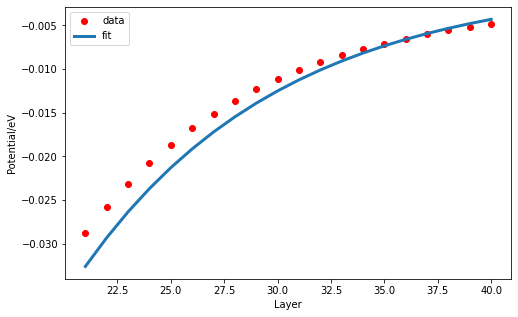

Mean absolute error: 0.00105
Residual sum of squares (MSE): 0.00000
R2-score: -0.68687


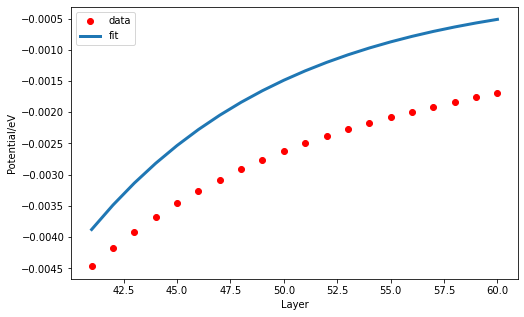

Mean absolute error: 0.00073
Residual sum of squares (MSE): 0.00000
R2-score: -1.86943


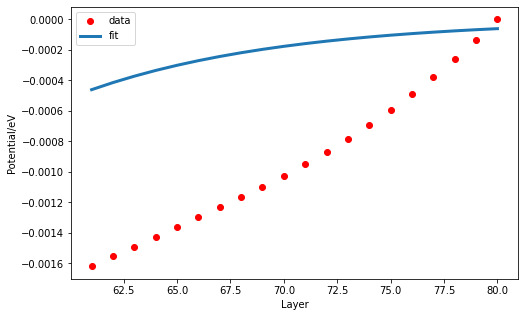

r2_score aveage over 4 validations: -0.15880199796056677
_____________________________________________________________________________
-0.28 eV :
Mean absolute error: 0.00597
Residual sum of squares (MSE): 0.00005
R2-score: 0.99131


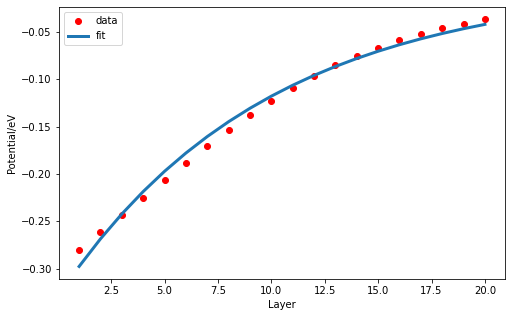

Mean absolute error: 0.00233
Residual sum of squares (MSE): 0.00001
R2-score: 0.87196


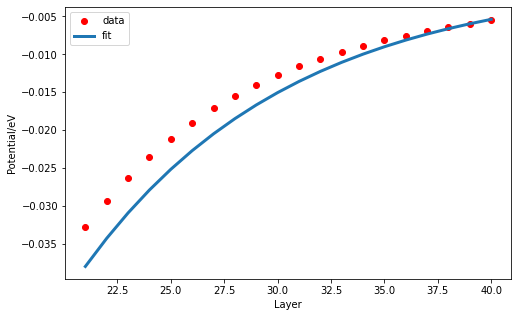

Mean absolute error: 0.00096
Residual sum of squares (MSE): 0.00000
R2-score: -0.09143


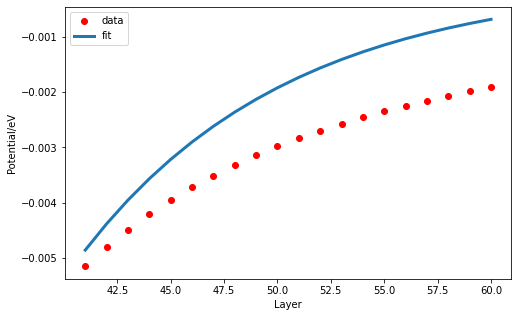

Mean absolute error: 0.00076
Residual sum of squares (MSE): 0.00000
R2-score: -1.48201


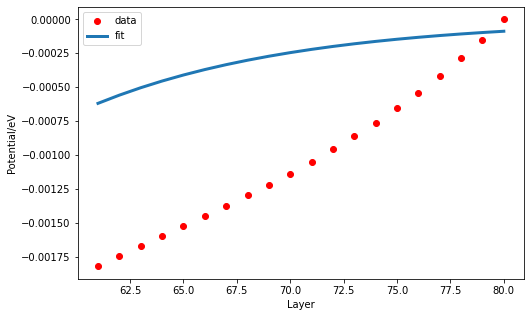

r2_score aveage over 4 validations: 0.07245840702714046
_____________________________________________________________________________
-0.3 eV :
Mean absolute error: 0.00747
Residual sum of squares (MSE): 0.00008
R2-score: 0.98797


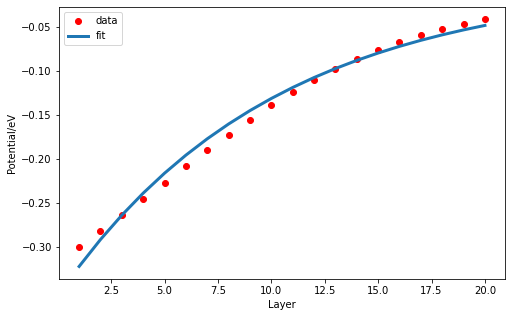

Mean absolute error: 0.00357
Residual sum of squares (MSE): 0.00002
R2-score: 0.79371


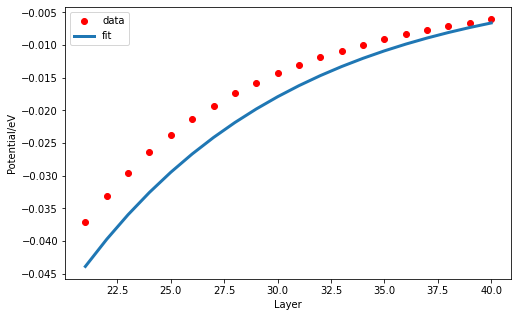

Mean absolute error: 0.00070
Residual sum of squares (MSE): 0.00000
R2-score: 0.46482


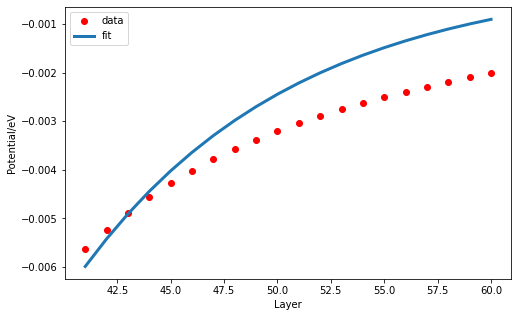

Mean absolute error: 0.00072
Residual sum of squares (MSE): 0.00000
R2-score: -0.99583


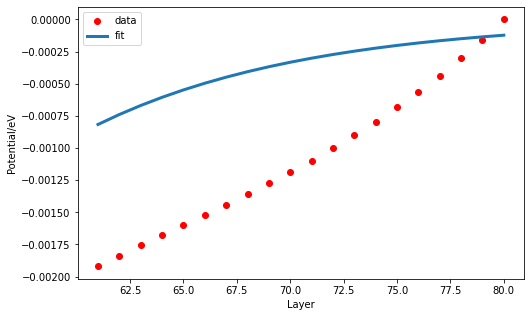

r2_score aveage over 4 validations: 0.3126675054911978
_____________________________________________________________________________
average r2_score -0.673343845848262


In [23]:
# number of cross-validation 
n = 4

# to save coefficients 
popt_array = [0 for a in range(step)]

# to save r2_score
r2_array = [0 for a in range(step)]

V_0_array = [0 for a in range(step)]

for i in range(step):
    
    
    # Setting up dataframe
    df = pd.read_csv(pot_name_array[i])
    V_0 = float(df.columns[0])
    df.loc[-1] = V_0
    df.index = df.index + 1
    df.sort_index(inplace=True) 
    df['layer'] = range(1,df.shape[0]+ 1, 1)
    df.rename(columns = {df.columns[0]: 'potential'}, inplace = True)
    tot_layer = df.shape[0]
    sheet_carrier_density = float(pd.read_csv(meta_name_array[0]).iloc[-1].values[0])
    df['sheet_carrier_density'] = sheet_carrier_density
    V_0_array[i] = V_0
    
    x_data, y_data = (df["layer"].values, df["potential"].values)
    
    popt, pcov = curve_fit(fit_function, x_data, y_data)
    popt_array[i] = popt
    print(str(V_0), 'eV :')
    #print('coefficients', popt)
    
    # Plotting plot
    '''
    x = df['layer'] 
    plt.figure(figsize=(8,5))
    y = fit_function(x, *popt)
    plt.plot(x_data, y_data, 'ro', label='data')
    plt.plot(x,y, linewidth=3.0, label='fit')
    plt.legend(loc='best')
    plt.ylabel('Potential/eV')
    plt.xlabel('Layer')
    plt.show()
    '''
    
    kf = KFold(n_splits=n) # Define the split - into 2 folds 
    kf.get_n_splits(x_data) # returns the number of splitting iterations in the cross-validator

    r2score = 0 

    for train_index, test_index in kf.split(x_data):
        X_train, X_test = x_data[train_index], x_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]

        # predict using test set
        y_hat = fit_function(X_test, *popt)
        # evaluation
        print("Mean absolute error: %.5f" % np.mean(np.absolute(y_hat - y_test)))
        print("Residual sum of squares (MSE): %.5f" % np.mean((y_hat - y_test) ** 2))
        print("R2-score: %.5f" % r2_score(y_test,y_hat) )
        r2score += r2_score(y_test,y_hat)

        
        x = X_test 
        plt.figure(figsize=(8,5))
        y = fit_function(x, *popt)
        plt.plot(X_test, y_test, 'ro', label='data')
        plt.plot(X_test ,y_hat, linewidth=3.0, label='fit')
        plt.legend(loc='best')
        plt.ylabel('Potential/eV')
        plt.xlabel('Layer')
        plt.show()
        

    r2score = r2score/n
    r2_array[i] = r2score
    print('r2_score aveage over', n, 'validations:', r2score)
    print('_____________________________________________________________________________')

popt_array = np.asanyarray(popt_array)

print('average r2_score', np.mean(r2_array))